In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from common.data_frame_columns import PM10, PM2_5, PM1
from common.date_time_helper import convert_to_datetime
from common.endpoints_urls import endpoints_config
from common.working_dataset_config import working_datetime, test_date_time_strings
from data_management.data_crawler import DataManager
from data_management.data_reshaper import reshape_data, prepare_dataset, flatten_data
from data_management.labeled_data_generator import LabeledDataGenerator, DataLabel
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
date_strings = ['01.01.2021 00:00', '31.12.2023 23:59']
test_dates_string = ['01.01.2024 00:00', '30.04.2024 23:59']

training_dates = [convert_to_datetime(date_strings[0]), convert_to_datetime(date_strings[1])]
test_dates = [convert_to_datetime(test_dates_string[0]), convert_to_datetime(test_dates_string[1])]

datas = DataManager(True).get_all_endpoints_data(endpoints_config, update=False)

column = PM10
L = LabeledDataGenerator(column)

test_data = L.generate_labeled_data(datas[:1], test_dates[0], test_dates[1], 40)
single_data = L.generate_labeled_data(datas[:1], training_dates[0], training_dates[1], 40)
multi_data = L.generate_labeled_data(datas, training_dates[0], training_dates[1], 40)

Loading station data: Gronie  https://datahub.ki.agh.edu.pl/api/endpoints/70/data/
    # Minimal data: 2022-07-13 23:38:02+00:00
    # Maximal data: 2024-05-10 16:16:39+00:00
Loading station data: Urząd Gminy  https://datahub.ki.agh.edu.pl/api/endpoints/71/data/
    # Minimal data: 2023-10-28 07:17:18+00:00
    # Maximal data: 2024-05-10 16:15:37+00:00
Loading station data: Młynne  https://datahub.ki.agh.edu.pl/api/endpoints/72/data/
    # Minimal data: 2022-02-12 21:11:18+00:00
    # Maximal data: 2024-05-10 16:15:59+00:00
Loading station data: Sucharskiego  https://datahub.ki.agh.edu.pl/api/endpoints/73/data/
    # Minimal data: 2021-10-07 19:41:43+00:00
    # Maximal data: 2024-05-10 16:19:11+00:00
Loading station data: Twardowskiego  https://datahub.ki.agh.edu.pl/api/endpoints/74/data/
    # Minimal data: 2021-10-07 20:59:56+00:00
    # Maximal data: 2024-05-10 16:20:04+00:00
Loading station data: Konopnickiej  https://datahub.ki.agh.edu.pl/api/endpoints/75/data/
    # Minimal data

In [9]:
class MyMLPClassifier:
    def __init__(self):
        self.xdxd = MLPClassifier()

    def fit_data(self, labeled_data, column):
        X, y = prepare_dataset(labeled_data, column)
        X = flatten_data(X)
        self.xdxd.fit(X, y)

    def test_accuracy(self, labeled_data, column):
        X_set, y_set = prepare_dataset(labeled_data, column)
        X_set = flatten_data(X_set)
        predicted = self.xdxd.predict(X_set)
        accuracy = accuracy_score(y_set, predicted)
        precision = precision_score(y_set, predicted, average='weighted')
        recall = recall_score(y_set, predicted, average='weighted')
        f1 = f1_score(y_set, predicted, average='weighted', zero_division=np.nan)

        return accuracy, precision, recall, f1

In [4]:
from matplotlib import pyplot as plt

activations = ['identity', 'logistic', 'tanh', 'relu']

config_list = [
    # {
    #     'name': 'mlp_SDSC',
    #     'columns': [PM10],
    #     'training_datas': single_data,
    #     'test_datas': test_data
    # },
    # {
    #     'name': 'mlp_SDMC',
    #     'columns': [PM10, PM1, PM2_5],
    #     'training_datas': single_data,
    #     'test_datas': test_data
    # },
    # {
    #     'name': 'mlp_MDSC',
    #     'columns': [PM10],
    #     'training_datas': multi_data,
    #     'test_datas': test_data
    # },
    {
        'name': 'mlp_MDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': multi_data,
        'test_datas': test_data
    }
]
# 
# Best parameters found:
# #  {'activation': 'relu', 'hidden_layer_sizes': (40, 60), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
# 
# final_result = []
# for config in config_list:
#     acc = []
#     prec = []
#     rec = []
#     f1_s = []
# 
#     knn = MyMLPClassifier('relu')
#     knn.fit_data(config['training_datas'], config['columns'])
#     accuracy, precision, recall, f1 = knn.test_accuracy(config['test_datas'], config['columns'])
#     acc.append(accuracy)
#     prec.append(precision)
#     rec.append(recall)
#     f1_s.append(f1)
# 
#     print({'name': config['name'], 'accuracy': accuracy, 'precision': precision, 'recall': recall,
#            'f1': f1})
#     plt.figure(figsize=(10, 10))
#     plt.plot(knn.xdxd.loss_curve_, label=config['name'])
# 
#     final_result.append({'name': config['name'],
#                          'acc': acc,
#                          'prec': prec,
#                          'recall': rec,
#                          'f1': f1_s, })
# 
#     plt.show()

In [5]:
# from sklearn.model_selection import GridSearchCV
# from numpy.ma import product
# 
# 
# def generate_hidden_layer_sizes():
#     # Rozmiary warstw od 10 do 100 z krokiem co 5
#     sizes = range(10, 105, 10)
# 
#     # Wszystkie rozmiary dla jednej warstwy
#     one_layer_sizes = [(size,) for size in sizes]
# 
#     # Wszystkie rozmiary dla dwóch warstw
#     two_layer_sizes = [(size1, size2) for size1 in sizes for size2 in sizes]
# 
#     # Łączenie wszystkich konfiguracji
#     all_sizes = one_layer_sizes + two_layer_sizes
# 
#     return all_sizes
# 
# 
# config_list_test = [
#     {
#         'name': 'mlp_SDSC',
#         'columns': [PM10],
#         'training_datas': single_data,
#         'test_datas': test_data
#     },
#     {
#         'name': 'mlp_SDMC',
#         'columns': [PM10, PM1, PM2_5],
#         'training_datas': single_data,
#         'test_datas': test_data
#     },
#     {
#         'name': 'mlp_MDSC',
#         'columns': [PM10],
#         'training_datas': multi_data,
#         'test_datas': test_data
#     },
#     {
#         'name': 'mlp_MDMC',
#         'columns': [PM10, PM1, PM2_5],
#         'training_datas': multi_data,
#         'test_datas': test_data
#     }
# ]
# 
# # Generowanie konfiguracji hidden_layer_sizes
# hidden_layer_sizes = generate_hidden_layer_sizes()
# print(len(hidden_layer_sizes))
# 
# # Definiowanie przestrzeni parametrów
# 
# for activation in activations:
#     parameter_space = {
#         'hidden_layer_sizes': hidden_layer_sizes,
#         'activation': [activation],
#         'solver': ['sgd'],
#         'max_iter': [1000],
#         'random_state': [42]
#     }
# 
#     for config in config_list_test:
#         name = config['name']
#         # Inicjalizacja MLPClassifier
#         mlp = MLPClassifier()
# 
#         # Inicjalizacja GridSearchCV
#         clf = GridSearchCV(mlp, parameter_space, n_jobs=10, cv=3)
# 
#         X, y = prepare_dataset(config['training_datas'], config['columns'])
#         X = flatten_data(X)
#         # Trenowanie modelu
#         clf.fit(X, y)
# 
#         # Najlepsze parametry
#         print(f'[{name}] Best parameters found: \n {clf.best_params_}')


# Testy dla zdefiniowanych przez GridSearch parametrów 

/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_SDSC', 'activation': 'identity', 'accuracy': 0.5841584158415841, 'precision': 0.6227559569143728, 'recall': 0.5841584158415841, 'f1': 0.5596940646445597}
{'name': 'mlp_SDMC', 'activation': 'identity', 'accuracy': 0.7722772277227723, 'precision': 0.7777163430628776, 'recall': 0.7722772277227723, 'f1': 0.7616014508836169}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_MDSC', 'activation': 'identity', 'accuracy': 0.46534653465346537, 'precision': 0.5641947350478735, 'recall': 0.46534653465346537, 'f1': 0.48464406297076784}
{'name': 'mlp_MDMC', 'activation': 'identity', 'accuracy': 0.7722772277227723, 'precision': 0.7565169420167822, 'recall': 0.7722772277227723, 'f1': 0.7361304396693539}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_SDSC', 'activation': 'logistic', 'accuracy': 0.6831683168316832, 'precision': 0.638961734011239, 'recall': 0.6831683168316832, 'f1': 0.6134509922941398}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_SDMC', 'activation': 'logistic', 'accuracy': 0.7623762376237624, 'precision': 0.6674917491749175, 'recall': 0.7623762376237624, 'f1': 0.6913400439953243}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_MDSC', 'activation': 'logistic', 'accuracy': 0.7326732673267327, 'precision': 0.6141757032846142, 'recall': 0.7326732673267327, 'f1': 0.6631200468585704}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_MDMC', 'activation': 'logistic', 'accuracy': 0.8217821782178217, 'precision': 0.8273733255678509, 'recall': 0.8217821782178217, 'f1': 0.7895332390381896}
{'name': 'mlp_SDSC', 'activation': 'tanh', 'accuracy': 0.6633663366336634, 'precision': 0.5647588501304859, 'recall': 0.6633663366336634, 'f1': 0.6015838517649674}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_SDMC', 'activation': 'tanh', 'accuracy': 0.6831683168316832, 'precision': 0.5955981899559819, 'recall': 0.6831683168316832, 'f1': 0.6186182618261826}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'name': 'mlp_MDSC', 'activation': 'tanh', 'accuracy': 0.7227722772277227, 'precision': 0.6320978526424071, 'recall': 0.7227722772277227, 'f1': 0.6478124709655787}
{'name': 'mlp_MDMC', 'activation': 'tanh', 'accuracy': 0.8613861386138614, 'precision': 0.8484598459845983, 'recall': 0.8613861386138614, 'f1': 0.8284226698531921}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_SDSC', 'activation': 'relu', 'accuracy': 0.7425742574257426, 'precision': 0.7118787965753098, 'recall': 0.7425742574257426, 'f1': 0.7055460091463691}
{'name': 'mlp_SDMC', 'activation': 'relu', 'accuracy': 0.801980198019802, 'precision': 0.7990293146961756, 'recall': 0.801980198019802, 'f1': 0.7632013201320133}


/media/kkoz34/HDD_kkoz34/Magisterka/Magisterka/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'name': 'mlp_MDSC', 'activation': 'relu', 'accuracy': 0.7821782178217822, 'precision': 0.7693069306930693, 'recall': 0.7821782178217822, 'f1': 0.7453568886300396}
{'name': 'mlp_MDMC', 'activation': 'relu', 'accuracy': 0.8514851485148515, 'precision': 0.8708542985446086, 'recall': 0.8514851485148515, 'f1': 0.8177726506779189}


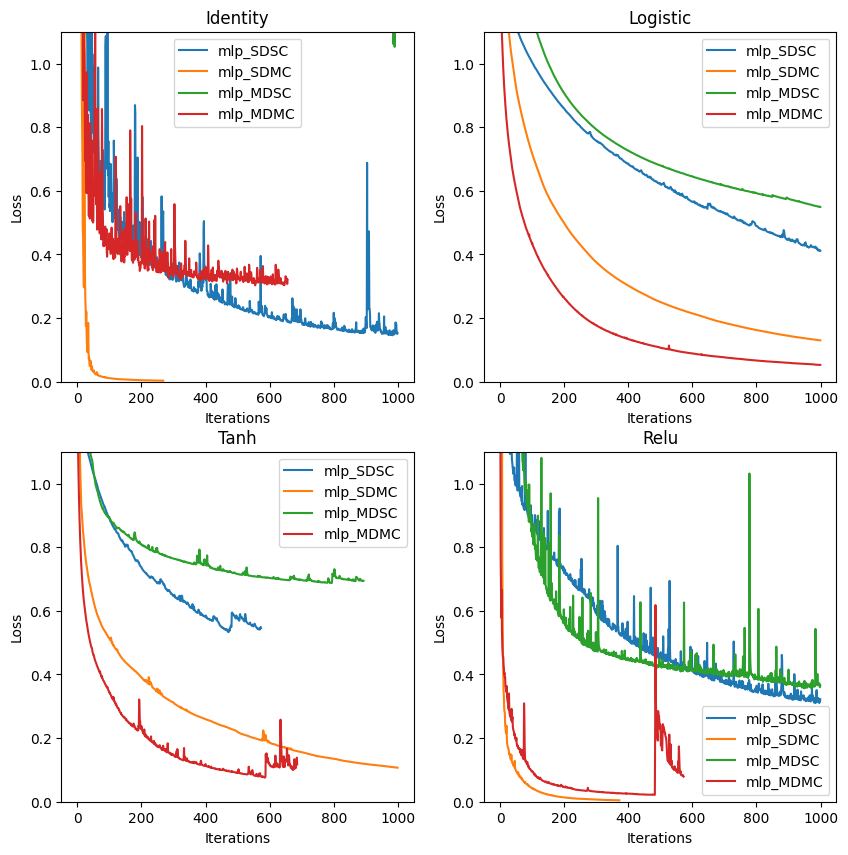

In [19]:
config_list_test = [
    {
        'name': 'mlp_SDSC',
        'columns': [PM10],
        'training_datas': single_data,
        'test_datas': test_data,
        'subplot': 1,
    },
    {
        'name': 'mlp_SDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': single_data,
        'test_datas': test_data,
        'subplot': 2,
    },
    {
        'name': 'mlp_MDSC',
        'columns': [PM10],
        'training_datas': multi_data,
        'test_datas': test_data,
        'subplot': 3,
    },
    {
        'name': 'mlp_MDMC',
        'columns': [PM10, PM1, PM2_5],
        'training_datas': multi_data,
        'test_datas': test_data,
        'subplot': 4,
    }
]

definied_params = {
    'mlp_SDSC': [
        {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
    ],

    'mlp_SDMC': [
        {'activation': 'identity', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'relu', 'hidden_layer_sizes': (90, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
    ],
    ' mlp_MDSC': [
        {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'logistic', 'hidden_layer_sizes': (70, 100), 'max_iter': 1000, 'random_state': 42,
         'solver': 'sgd'},
        {'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'relu', 'hidden_layer_sizes': (30, 40), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
    ],
    'mlp_MDMC': [
        {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'tanh', 'hidden_layer_sizes': (30, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'},
        {'activation': 'relu', 'hidden_layer_sizes': (40, 100), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
    ]
}

xxx = [
    ['identity', {
        'mlp_SDSC': {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42,
                     'solver': 'sgd', 'n_iter_no_change':100},
        'mlp_SDMC': {'activation': 'identity', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'random_state': 42,
                     'solver': 'sgd', 'n_iter_no_change':100},
        'mlp_MDSC': {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42,
                     'solver': 'sgd', 'n_iter_no_change':100},
        'mlp_MDMC': {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42,
                     'solver': 'sgd', 'n_iter_no_change':100},
    }, ], [
        'logistic', {
            'mlp_SDSC': {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
            'mlp_SDMC': {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
            'mlp_MDSC': {'activation': 'logistic', 'hidden_layer_sizes': (70, 100), 'max_iter': 1000,
                         'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
            'mlp_MDMC': {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
        }, ], [
        'tanh', {
            'mlp_SDSC': {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},

            'mlp_SDMC': {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},

            'mlp_MDSC': {'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
            'mlp_MDMC': {'activation': 'tanh', 'hidden_layer_sizes': (30, 80), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
        }, ], [
        'relu', {
            'mlp_SDSC': {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
            'mlp_SDMC': {'activation': 'relu', 'hidden_layer_sizes': (90, 80), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
            'mlp_MDSC': {'activation': 'relu', 'hidden_layer_sizes': (30, 40), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
            'mlp_MDMC': {'activation': 'relu', 'hidden_layer_sizes': (40, 100), 'max_iter': 1000, 'random_state': 42,
                         'solver': 'sgd', 'n_iter_no_change':100},
        }
    ]
]
labels = ['identity', 'logistic', 'tanh', 'relu']

result = []
plt.figure(figsize=(10, 10))
subplot = 1
for activation in xxx:
    activation_name = activation[0]
    params = activation[1]

    plt.subplot(2, 2, subplot)
    plt.title(activation_name.title())

    for config in config_list_test:
        name = config['name']
        knn = MyMLPClassifier()
        knn.xdxd.set_params(**params[name])
        knn.fit_data(config['training_datas'], config['columns'])
        accuracy, precision, recall, f1 = knn.test_accuracy(config['test_datas'], config['columns'])

        print({'name': name, 'activation': activation_name, 'accuracy': accuracy, 'precision': precision,
               'recall': recall,
               'f1': f1})
        plt.plot(knn.xdxd.loss_curve_, label=name)

        result.append({'name': name, 'activation': activation_name, 'accuracy': accuracy, 'precision': precision,
                       'recall': recall,
                       'f1': f1})

    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.ylim(0.0, 1.1)
    subplot += 1
plt.show()




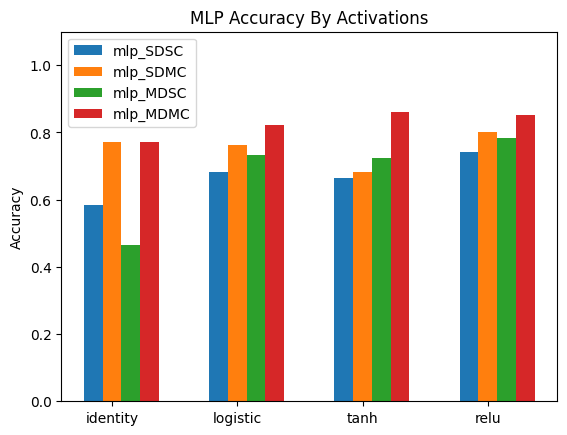

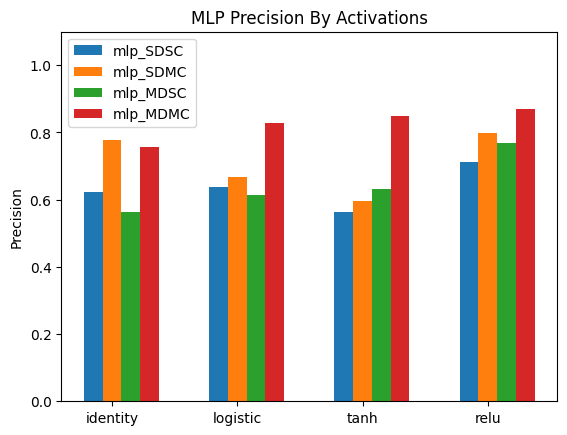

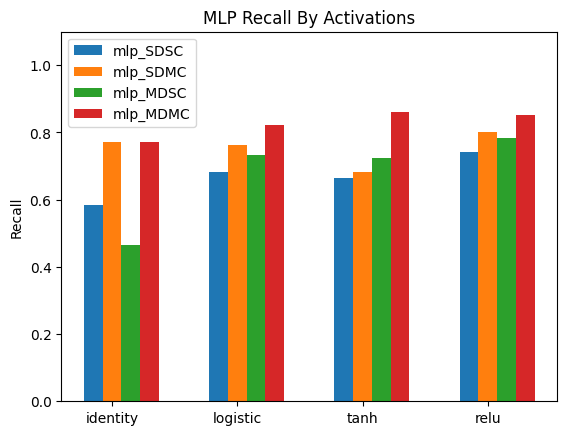

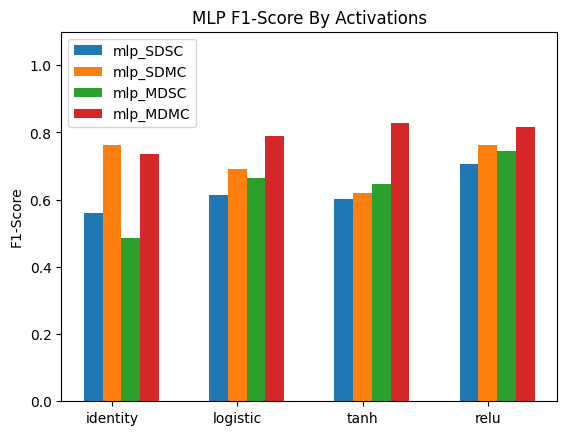

In [24]:
x_labels = labels
x = np.arange(len(x_labels))
width = 0.15
multiplier = 0

variants = {
'mlp_SDSC' : [x for x in result if x['name'] == 'mlp_SDSC'],
'mlp_SDMC' : [x for x in result if x['name'] == 'mlp_SDMC'],
'mlp_MDSC' : [x for x in result if x['name'] == 'mlp_MDSC'],
'mlp_MDMC' : [x for x in result if x['name'] == 'mlp_MDMC'],
}

fig, ax = plt.subplots()
for key, value in variants.items():
    
    offset = width * multiplier
    xvalues = [x['accuracy'] for x in value]
    rects = ax.bar(x + offset, xvalues, width, label=key)
    # ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Accuracy')
ax.set_title('MLP Accuracy By Activations')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', )
ax.set_ylim(0, 1.1)
plt.show()


fig, ax = plt.subplots()
multiplier = 0
for key, value in variants.items():
    offset = width * multiplier
    xvalues = [x['precision'] for x in value]
    rects = ax.bar(x + offset, xvalues, width, label=key)
    # ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Precision')
ax.set_title('MLP Precision By Activations')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', )
ax.set_ylim(0, 1.1)
plt.show()


fig, ax = plt.subplots()
multiplier = 0
for key, value in variants.items():
    offset = width * multiplier
    xvalues = [x['recall'] for x in value]
    rects = ax.bar(x + offset, xvalues, width, label=key)
    # ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Recall')
ax.set_title('MLP Recall By Activations')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', )
ax.set_ylim(0, 1.1)
plt.show()


fig, ax = plt.subplots()
multiplier = 0
for key, value in variants.items():
    offset = width * multiplier
    xvalues = [x['f1'] for x in value]
    rects = ax.bar(x + offset, xvalues, width, label=key)
    # ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('F1-Score')
ax.set_title('MLP F1-Score By Activations')
ax.set_xticks(x + width, x_labels)
ax.legend(loc='upper left', )
ax.set_ylim(0, 1.1)
plt.show()

In [ ]:
'''
[mlp_SDSC] Best parameters found:
 {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDMC] Best parameters found:
 {'activation': 'identity', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDSC] Best parameters found:
 {'activation': 'identity', 'hidden_layer_sizes': (10,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDMC] Best parameters found:
 {'activation': 'identity', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDSC] Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDMC] Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDSC] Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (70, 100), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDMC] Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDSC] Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDMC] Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (40,), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDSC] Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (10, 50), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDMC] Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (30, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDSC] Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_SDMC] Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (90, 80), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDSC] Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (30, 40), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}

[mlp_MDMC] Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (40, 100), 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
 '''